<a href="https://colab.research.google.com/github/siyonabehera/DS320Project/blob/main/DS320FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns;
import plotly.express as ps
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from scipy.stats import kruskal
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
giturl = 'https://raw.githubusercontent.com/ginaaseo/DS320-Final-Project/main/HepatitisCdata.csv'
df = pd.read_csv(giturl)

HepC = df
HepC.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
HepC.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
HepC = HepC.drop(['Unnamed: 0'], axis = 1)
HepC

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
HepC = HepC.drop(['PROT', 'GGT', 'CHOL', 'CHE', 'ALB', 'CREA', 'ALP'], axis = 1)
HepC


,Category,Age,Sex,ALT,AST,BIL
0,0=Blood Donor,32,m,7.7,22.1,7.5
1,0=Blood Donor,32,m,18.0,24.7,3.9
2,0=Blood Donor,32,m,36.2,52.6,6.1
3,0=Blood Donor,32,m,30.6,22.6,18.9
4,0=Blood Donor,32,m,32.6,24.8,9.6
...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,5.9,110.3,50.0
611,3=Cirrhosis,64,f,2.9,44.4,20.0
612,3=Cirrhosis,64,f,3.5,99.0,48.0
613,3=Cirrhosis,46,f,39.0,62.0,20.0


In [ ]:
HepC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALT       614 non-null    float64
 4   AST       615 non-null    float64
 5   BIL       615 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 29.0+ KB


In [ ]:
HepC = HepC[HepC['Category'] != '3=Cirrhosis']
HepC = HepC[HepC['Category'] != '2=Fibrosis']
HepC

,Category,Age,Sex,ALT,AST,BIL
0,0=Blood Donor,32,m,7.7,22.1,7.5
1,0=Blood Donor,32,m,18.0,24.7,3.9
2,0=Blood Donor,32,m,36.2,52.6,6.1
3,0=Blood Donor,32,m,30.6,22.6,18.9
4,0=Blood Donor,32,m,32.6,24.8,9.6
...,...,...,...,...,...,...
559,1=Hepatitis,58,m,12.2,63.2,13.0
560,1=Hepatitis,33,f,3.8,16.7,6.0
561,1=Hepatitis,41,f,8.2,38.3,7.0
562,1=Hepatitis,50,f,9.0,46.0,10.0


In [ ]:
#perform zscore normalizization through StandardScalar() and find outlier
numerical_cols = HepC.select_dtypes(include=[np.number]).columns.tolist()
z_score = np.abs(stats.zscore(HepC[numerical_cols], nan_policy='omit'))
outl_thrsh = 3
outliers = (z_score > outl_thrsh)
outlier_count = outliers.sum(axis = 0)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(HepC[numerical_cols])
HepC_Scaled = pd.DataFrame(scaled_data, columns = numerical_cols)
outlier_count, HepC_Scaled.head()

(Age     1
 ALT     7
 AST    10
 BIL     9
 dtype: int64,
         Age       ALT       AST       BIL
 0 -1.503561 -0.946029 -0.334414 -0.191705
 1 -1.503561 -0.455908 -0.211845 -0.730070
 2 -1.503561  0.410132  1.103409 -0.401069
 3 -1.503561  0.143658 -0.310843  1.513118
 4 -1.503561  0.238827 -0.207131  0.122341)

In [ ]:
for col in HepC.columns:
  if HepC[col].isnull().sum() > 0:
    HepC[col].fillna(HepC[col].median(), inplace = True)

In [ ]:
if HepC['Sex'].dtype == 'object':
  HepC['Sex'] = HepC['Sex'].map({'m': 0, 'f': 1})
print(HepC.head())

        Category  Age  Sex   ALT   AST   BIL
0  0=Blood Donor   32    0   7.7  22.1   7.5
1  0=Blood Donor   32    0  18.0  24.7   3.9
2  0=Blood Donor   32    0  36.2  52.6   6.1
3  0=Blood Donor   32    0  30.6  22.6  18.9
4  0=Blood Donor   32    0  32.6  24.8   9.6


In [ ]:
categories = HepC['Category'].unique()
category_mapping = {category: i for i, category in enumerate(categories)}
HepC['Category'] = HepC['Category'].map(category_mapping)


In [ ]:
HepCStats = HepC.groupby('Category').agg(['mean', 'median', 'std'])
HepCStats

Age                         Sex                          ALT  \
               mean median        std      mean median       std        mean   
Category                                                                       
0         47.131332   47.0   9.623632  0.403377    0.0  0.491036   26.631520   
1         57.571429   55.0  11.073349  0.142857    0.0  0.377964  102.114286   
2         38.708333   37.0  11.350078  0.166667    0.0  0.380693   26.741667   

                                   AST                          BIL         \
         median         std       mean median        std       mean median   
Category                                                                     
0          23.1   14.500988  26.549156   24.8  10.617956   8.527580    6.9   
1          49.2  119.836909  71.000000   46.7  53.317758   4.685714    4.9   
2          18.3   22.111455  75.733333   47.2  68.780335  15.625000   13.0   

                     
                std  
Category             
0          6.087329  
1          3.113106  
2         13.467554

In [ ]:
grouped = HepC.groupby('Category')
kruskalresult = {}
for feature in HepC:
  samples = [group[feature].dropna().values for name, group in grouped]
  stat, p = kruskal(*samples)
  kruskalresult[feature] = {'Statistic': stat, 'P-value': p}

kruskalresult

{'Category': {'Statistic': np.float64(563.0000000000001),
  'P-value': np.float64(5.573183520129081e-123)},
 'Age': {'Statistic': np.float64(18.24990038584148),
  'P-value': np.float64(0.00010891419441788837)},
 'Sex': {'Statistic': np.float64(7.216635406567609),
  'P-value': np.float64(0.027097394400992587)},
 'ALT': {'Statistic': np.float64(4.95083471078968),
  'P-value': np.float64(0.08412787170824834)},
 'AST': {'Statistic': np.float64(51.79510851290985),
  'P-value': np.float64(5.660243199908075e-12)},
 'BIL': {'Statistic': np.float64(22.790280902863902),
  'P-value': np.float64(1.1250022251193324e-05)}}

In [ ]:
corr_matrix = HepC[numerical_cols].corr()
corr_matrix

,Age,ALT,AST,BIL
Age,1.000000,-0.027935,-0.018816,-0.065221
ALT,-0.027935,1.000000,0.426438,0.057093
AST,-0.018816,0.426438,1.000000,0.308751
BIL,-0.065221,0.057093,0.308751,1.000000


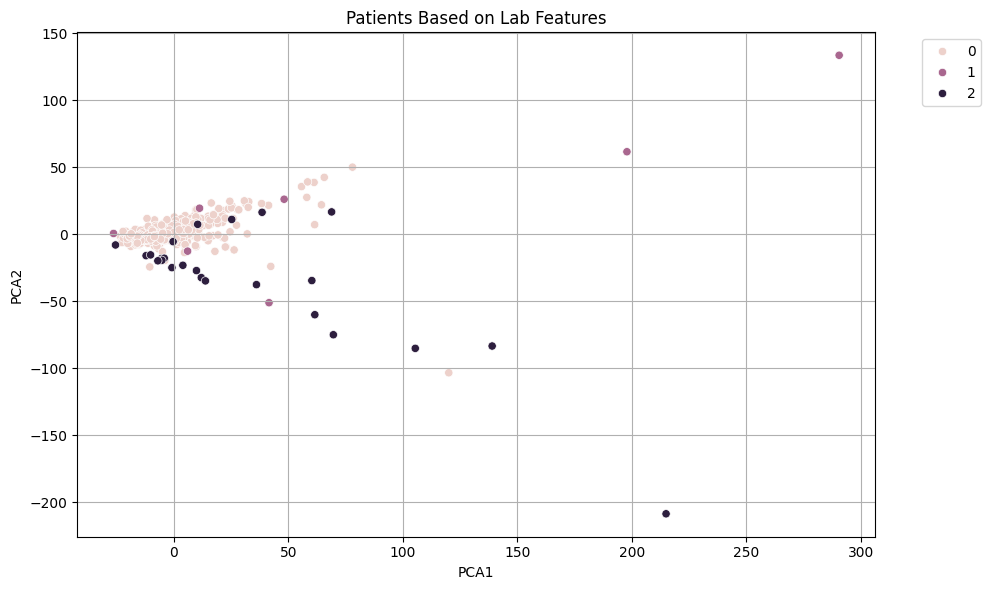

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(HepC[numerical_cols])
HepC['PCA1'] = pca_result[:, 0]
HepC['PCA2'] = pca_result[:, 1]
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Category', data = HepC)
plt.title('Patients Based on Lab Features')
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X = HepC[numerical_cols + ['Sex']]
y = HepC['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [ ]:
LogReg_RanFor = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Random Forest': RandomForestClassifier(random_state = 42)
}

mlresult = {}

for model_name, model in LogReg_RanFor.items():
  model.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  y_probability = model.predict_proba(X_test)
  classreport = classification_report(y_test, y_prediction, output_dict=True)
  mlresult[model_name] = {'Classification Report': classreport}

mlresult

{'Logistic Regression': {'Classification Report': {'0': {'precision': 0.9727272727272728,
    'recall': 1.0,
    'f1-score': 0.9861751152073732,
    'support': 107.0},
   '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
   '2': {'precision': 1.0,
    'recall': 0.4,
    'f1-score': 0.5714285714285714,
    'support': 5.0},
   'accuracy': 0.9646017699115044,
   'macro avg': {'precision': 0.6575757575757576,
    'recall': 0.4666666666666666,
    'f1-score': 0.5192012288786482,
    'support': 113.0},
   'weighted avg': {'precision': 0.9653258246178601,
    'recall': 0.9646017699115044,
    'f1-score': 0.9590962848170956,
    'support': 113.0}}},
 'Random Forest': {'Classification Report': {'0': {'precision': 0.963963963963964,
    'recall': 1.0,
    'f1-score': 0.981651376146789,
    'support': 107.0},
   '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
   '2': {'precision': 1.0,
    'recall': 0.2,
    'f1-score': 0.3333333333333333,
    'supp

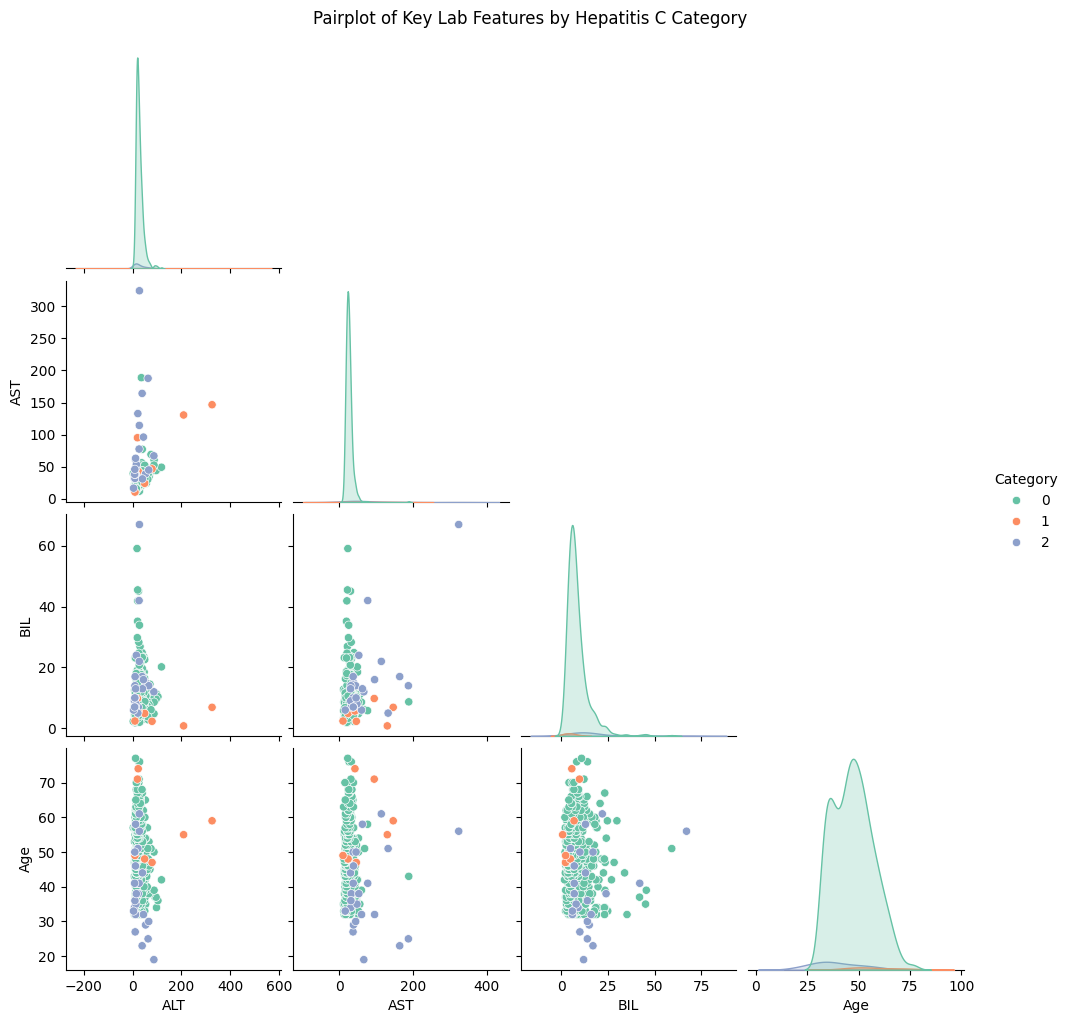

In [ ]:
# Choose a few important features (otherwise it gets too messy)
important_features = ['ALT', 'AST', 'BIL', 'Age']

# Add 'Category' for coloring (hue)
sns.pairplot(HepC, vars=important_features, hue='Category', palette='Set2', corner=True)

plt.suptitle('Pairplot of Key Lab Features by Hepatitis C Category', y=1.02)
plt.show()

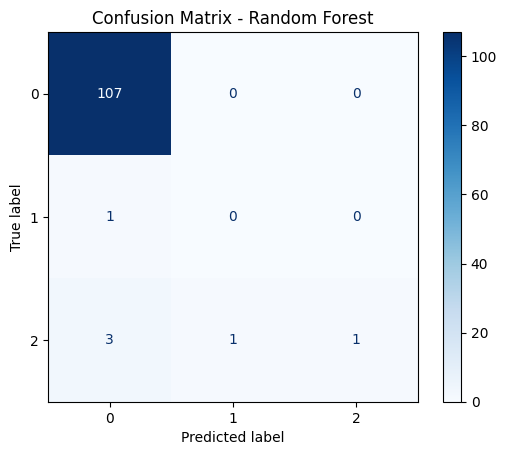

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Example for Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

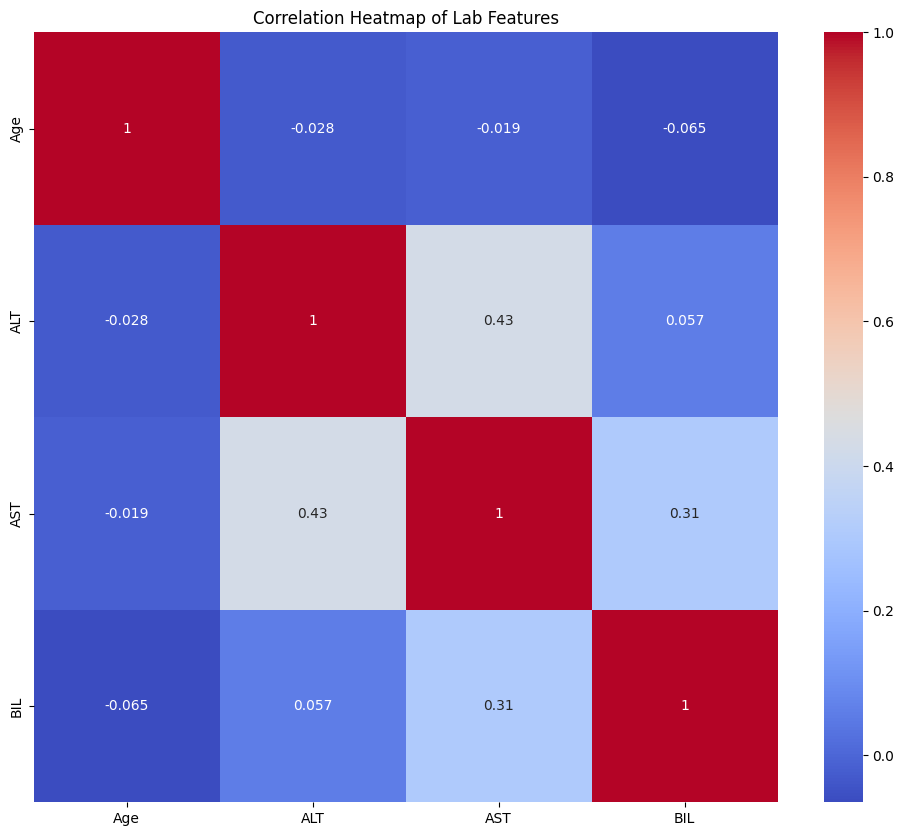

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Lab Features')
plt.show()